<a href="https://colab.research.google.com/github/AhmedDiab353/Video-Games-Sales-Data-Visualization/blob/main/Data_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Video Games Data Visualization Project***

---



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
cleaned_df = df[~df['Year'].isin([2016, 2017, 2020])]
group_by_Year = cleaned_df.groupby(['Year']).size().reset_index(name='counts')
group_by_Year

,Year,counts
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14
5,1985.0,14
6,1986.0,21
7,1987.0,16
8,1988.0,15
9,1989.0,17


In [ ]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [ ]:
group_by_Platform = cleaned_df.groupby(['Platform']).size().reset_index(name='Games')
group_by_Year = cleaned_df.groupby(['Year']).size().reset_index(name='counts')
group_by_Genre = cleaned_df.groupby(['Genre']).size().reset_index(name='counts')
group_by_publisher = cleaned_df.groupby(['Publisher']).size().reset_index(name='counts')

#group_by_Platform
#group_by_Year
group_by_Genre
#group_by_publisher


,Genre,counts
0,Action,3196
1,Adventure,1252
2,Fighting,834
3,Misc,1721
4,Platform,876
5,Puzzle,582
6,Racing,1229
7,Role-Playing,1446
8,Shooter,1278
9,Simulation,857


***Distribuation Of Sales By Genre***

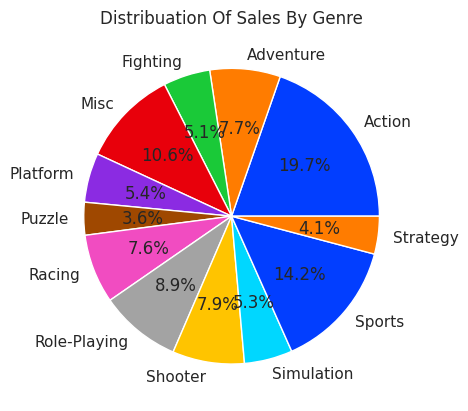

In [ ]:
sns.set_theme(palette='bright')
plt.pie(group_by_Genre['counts'],  labels=['Action', 'Adventure', 'Fighting', 'Misc' ,'Platform', 'Puzzle',
                                           'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy'], autopct='%1.1f%%')
plt.title('Distribuation Of Sales By Genre')
plt.savefig('Distribuation_Of_Sales_By_Genre.png', format='png', dpi=2000)

plt.show()

***Top 15 Publishers by Game Published***

In [ ]:
sorted_publisher= group_by_publisher.sort_values(by=['counts'], ascending= False)
top_15_rows= sorted_publisher.head(15)
top_15_rows

,Publisher,counts
137,Electronic Arts,1331
21,Activision,961
513,Ubisoft,907
339,Namco Bandai Games,892
269,Konami Digital Entertainment,824
477,THQ,715
351,Nintendo,693
446,Sony Computer Entertainment,678
437,Sega,629
483,Take-Two Interactive,401


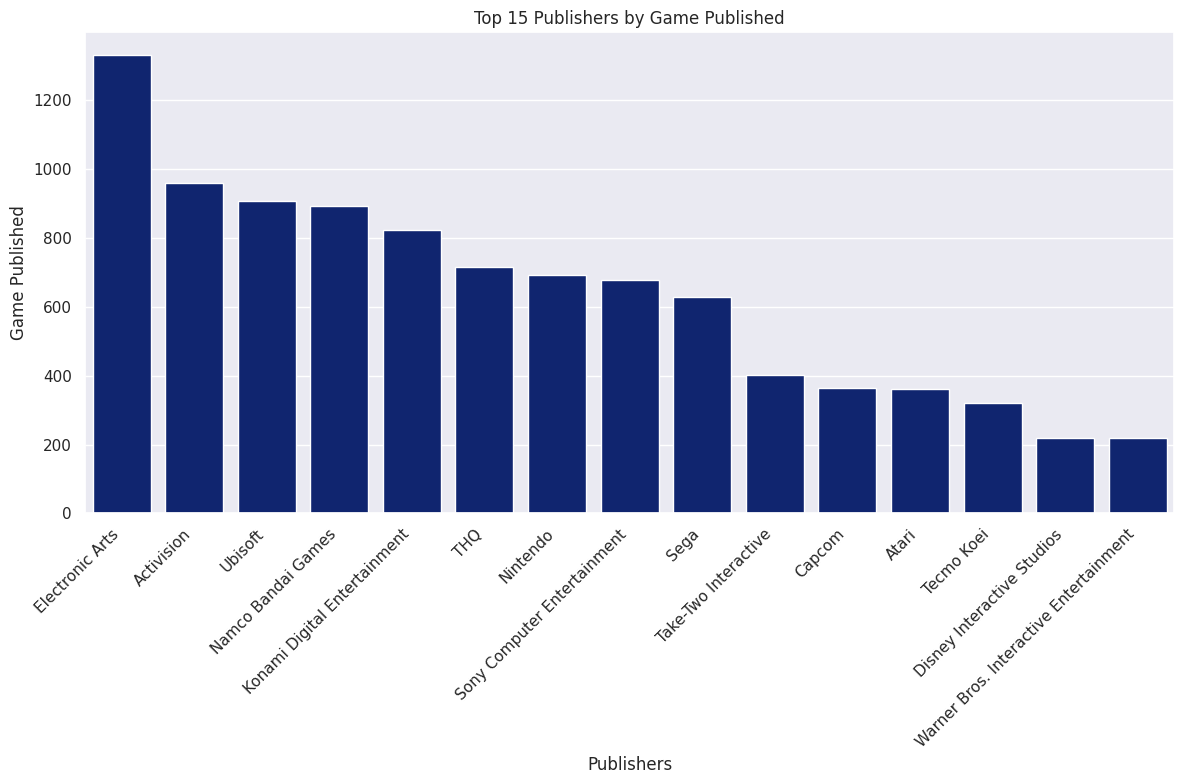

In [ ]:
sns.set_theme(style='darkgrid', palette='dark')
plt.figure(figsize=(12, 8))
sns.barplot(x='Publisher', y='counts', data=top_15_rows)
plt.xlabel('Publishers')
plt.ylabel('Game Published')
plt.title('Top 15 Publishers by Game Published')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Top_15_Publishers_by_Game_Published.png', format='png', dpi=2000)
plt.show()

***Market Share of Each Region in Global Video Game Sales***

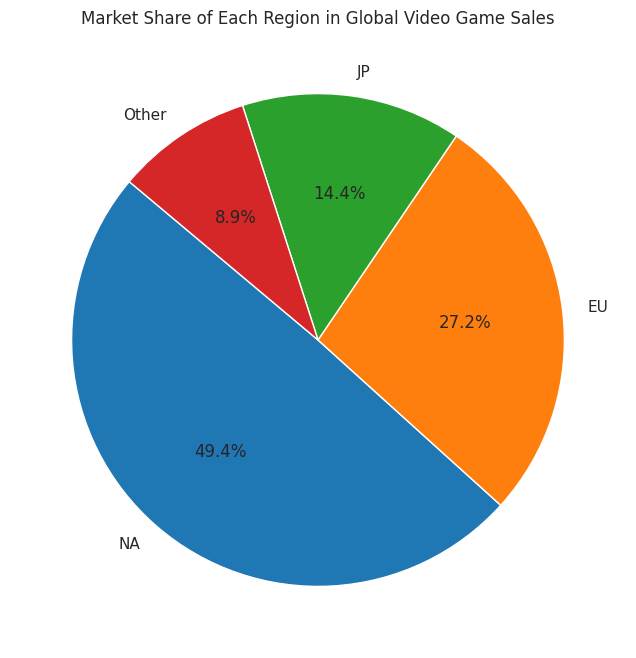

In [ ]:
na_sales_total = cleaned_df['NA_Sales'].sum()
eu_sales_total = cleaned_df['EU_Sales'].sum()
jp_sales_total = cleaned_df['JP_Sales'].sum()
other_sales_total = cleaned_df['Other_Sales'].sum()

sales_totals = [na_sales_total, eu_sales_total, jp_sales_total, other_sales_total]

regions = ['NA', 'EU', 'JP', 'Other']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

plt.figure(figsize=(8, 8))
plt.pie(sales_totals, labels=regions, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Market Share of Each Region in Global Video Game Sales')
plt.savefig('Market_Share_of_Each_Region_in_Global_Video_Game_Sales.png', format='png', dpi=2000)
plt.show()

***Top 15 Games by global sales***

In [ ]:
group_by_Global_Sales = cleaned_df.groupby(['Global_Sales', 'Name']).size().reset_index(name='counts')

sorted_by_global_sales=group_by_Global_Sales.sort_values(by=['Global_Sales'], ascending= False)
top_15_by_global_sales= sorted_by_global_sales.head(15)
top_15_by_global_sales

,Global_Sales,Name,counts
16044,82.74,Wii Sports,1
16043,40.24,Super Mario Bros.,1
16042,35.82,Mario Kart Wii,1
16041,33.00,Wii Sports Resort,1
16040,31.37,Pokemon Red/Pokemon Blue,1
16039,30.26,Tetris,1
16038,30.01,New Super Mario Bros.,1
16037,29.02,Wii Play,1
16036,28.62,New Super Mario Bros. Wii,1
16035,28.31,Duck Hunt,1


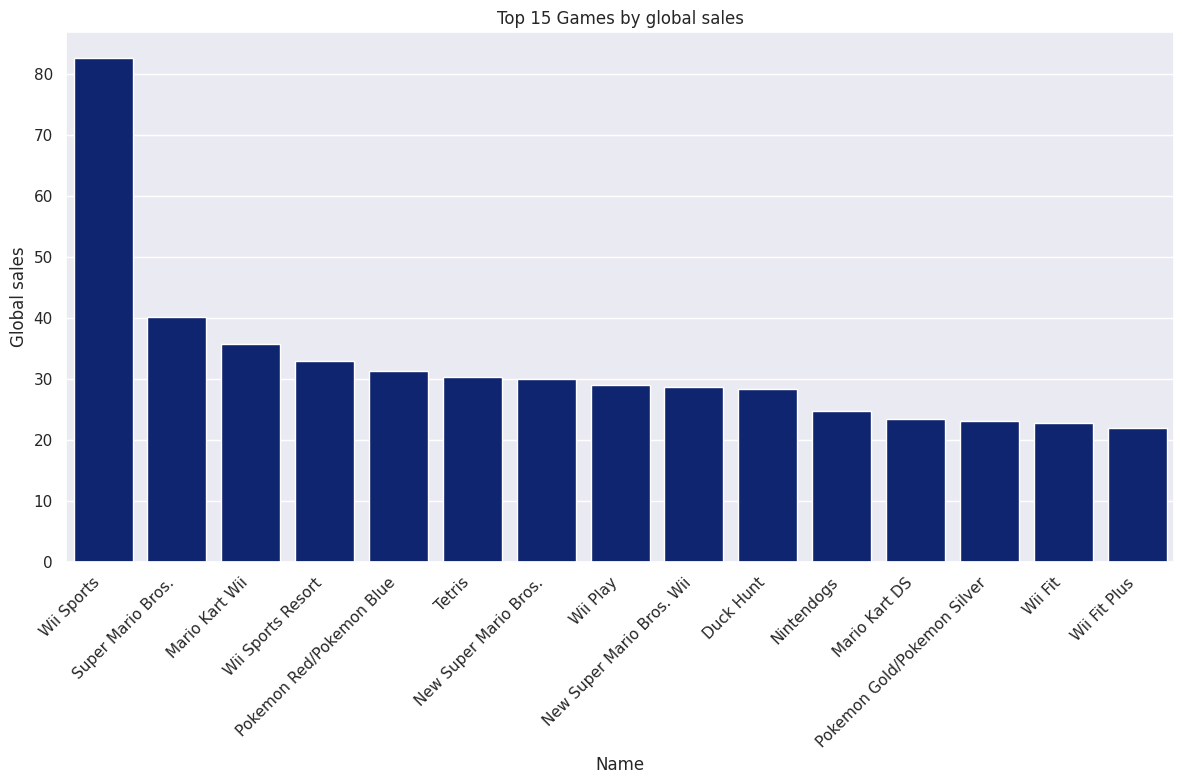

In [ ]:
sns.set_theme(style='darkgrid', palette='dark')
plt.figure(figsize=(12, 8))
sns.barplot(x='Name', y='Global_Sales', data=top_15_by_global_sales)
plt.xlabel('Name')
plt.ylabel('Global sales')
plt.title('Top 15 Games by global sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Top_15_Games_by_global_sales.png', format='png', dpi=2000)
plt.show()

***Sales Trend Over The Years***

In [ ]:
yearly_sales = cleaned_df.groupby('Year')['Global_Sales'].sum()

yearly_sales

Year
1980.0     11.38
1981.0     35.77
1982.0     28.86
1983.0     16.79
1984.0     50.36
1985.0     53.94
1986.0     37.07
1987.0     21.74
1988.0     47.22
1989.0     73.45
1990.0     49.39
1991.0     32.23
1992.0     76.16
1993.0     45.98
1994.0     79.17
1995.0     88.11
1996.0    199.15
1997.0    200.98
1998.0    256.47
1999.0    251.27
2000.0    201.56
2001.0    331.47
2002.0    395.52
2003.0    357.85
2004.0    419.31
2005.0    459.94
2006.0    521.04
2007.0    611.13
2008.0    678.90
2009.0    667.30
2010.0    600.45
2011.0    515.99
2012.0    363.54
2013.0    368.11
2014.0    337.05
2015.0    264.44
Name: Global_Sales, dtype: float64

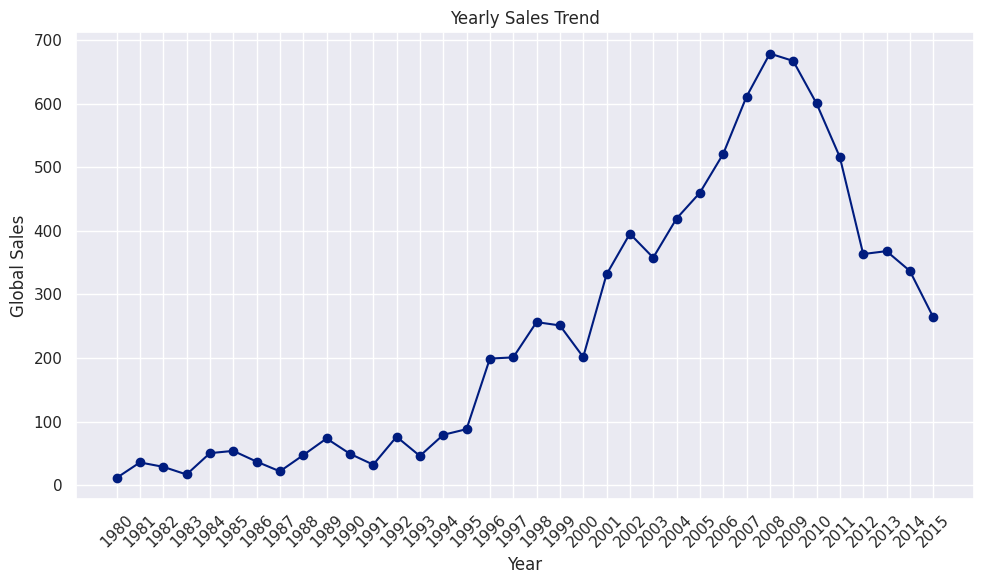

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.title('Yearly Sales Trend')
plt.grid(True)
plt.xticks(yearly_sales.index, rotation=45)
plt.tight_layout()
plt.savefig('yearly_sales_trend.png', format='png', dpi=2000)
plt.show()

***Top 15 platforms with the most ported games***

In [ ]:
sorted_platform= group_by_Platform.sort_values(by=['Games'], ascending= False)
top_15_platform= sorted_platform.head(15)
top_15_platform

,Platform,Games
4,DS,2162
16,PS2,2161
26,Wii,1325
17,PS3,1297
28,X360,1257
19,PSP,1213
15,PS,1196
13,PC,922
29,XB,824
6,GBA,822


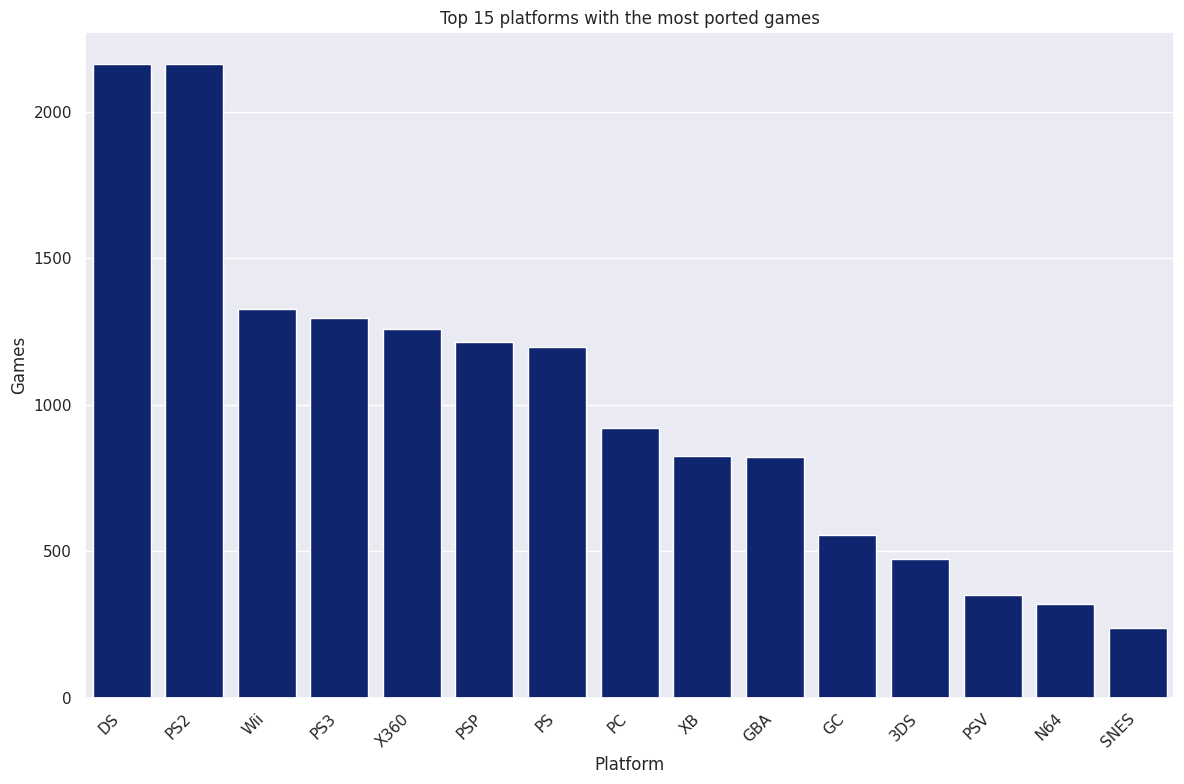

In [ ]:
sns.set_theme(style='darkgrid', palette='dark')
plt.figure(figsize=(12, 8))
sns.barplot(x='Platform', y='Games', data=top_15_platform)
plt.xlabel('Platform')
plt.ylabel('Games')
plt.title('Top 15 platforms with the most ported games')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Top_15_platforms_with_the_most_ported_games.png', format='png', dpi=2000)
plt.show()